
Objectives of building this code is as follows:

why are our best and most experienced employees leaving prematurely (inference)
using statstical modeling try to predict which valuable employees will leave next (predictive)

To tackle the above objective, the notebook combines exploratory data analysis and modeling.






# 01. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display

# 02. Load Data

In [2]:
hr = pd.read_csv('C:/Users/SAYAN/Desktop/hr.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# 03. Data Dictionary

In [3]:
display(hr.shape)

(14999, 10)

In [4]:
#Identify the Data Types - Numpy
hr_dd = pd.DataFrame(hr.dtypes,columns=['Numpy Dtype'])

#Identify the unique values
hr_dd['Nunique'] = hr.nunique()

#Identify the Missing values
hr_dd['MissingValues']=hr.isnull().sum()

# Identify the count for each variable
hr_dd['Count']=hr.count()

# Identify the zero values for each variable
hr_dd['ZeroValues']=(hr==0).sum()

hr_dd

,Numpy Dtype,Nunique,MissingValues,Count,ZeroValues
satisfaction_level,float64,92,0,14999,0
last_evaluation,float64,65,0,14999,0
number_project,int64,6,0,14999,0
average_montly_hours,int64,215,0,14999,0
time_spend_company,int64,8,0,14999,0
Work_accident,int64,2,0,14999,12830
left,int64,2,0,14999,11428
promotion_last_5years,int64,2,0,14999,14680
sales,object,10,0,14999,0
salary,object,3,0,14999,0


# 04. Descriptive Statistics

In [5]:
# I am interested in knowing the descriptive statistics 
# of the numerical variables
hr.describe(include=['number'])

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
# here the same procedure is applied on the categorical variables
hr.describe(include=['object'])

,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [7]:
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# 05. Univariate Analysis

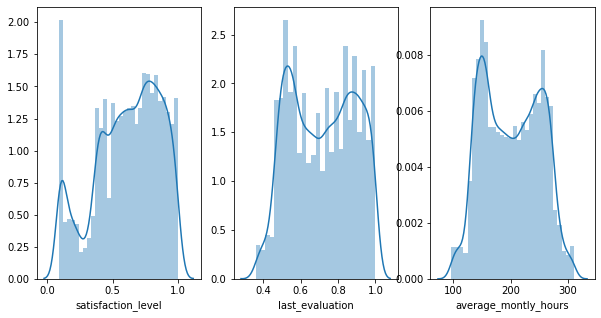

In [8]:
fig, axes = plt.subplots(ncols=3, figsize=(10,5))

g = sns.distplot(hr['satisfaction_level'],ax=axes[0])
g = sns.distplot(hr['last_evaluation'],ax=axes[1])
g = sns.distplot(hr['average_montly_hours'],ax=axes[2])

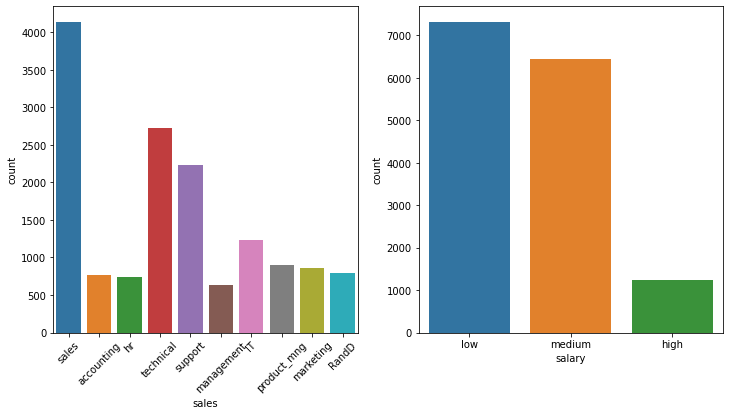

In [9]:
#distirbution of categorical columns using counter plots
fig, axes = plt.subplots(ncols=2,figsize=(12,6))
g = sns.countplot(hr["sales"], ax=axes[0])
plt.setp(g.get_xticklabels(), rotation=45)
g = sns.countplot(hr["salary"], ax=axes[1])

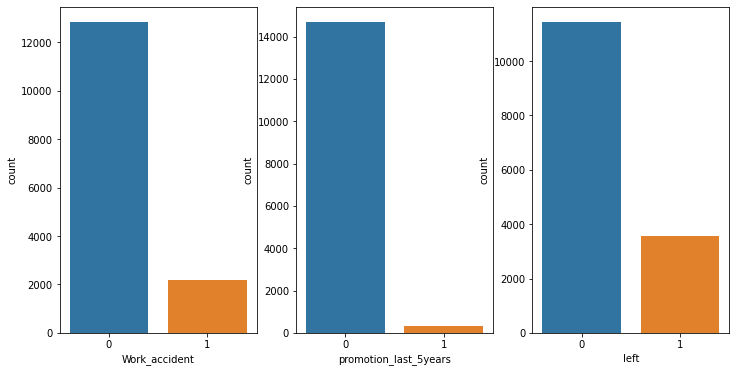

In [10]:
#distirbution of other numerical features
fig, axes = plt.subplots(ncols=3,figsize=(12,6))
g = sns.countplot(hr["Work_accident"], ax=axes[0])
g = sns.countplot(hr["promotion_last_5years"], ax=axes[1])
g = sns.countplot(hr["left"], ax=axes[2])

Text(0, 0.5, 'count')

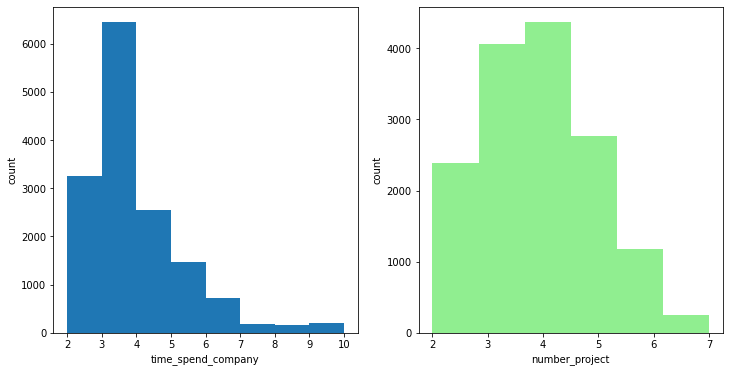

In [11]:
#distirbution of other numerical features
fig, axes = plt.subplots(ncols=2,figsize=(12,6))

g=hr['time_spend_company'].plot(kind='hist',ax=axes[0],bins=8)
g.set_xlabel('time_spend_company')
g.set_ylabel('count')

g=hr['number_project'].plot(kind='hist',ax=axes[1],bins=6,color='lightgreen')
g.set_xlabel('number_project')
g.set_ylabel('count')

# 06. Bivariate Analysis

Text(0.5, 1.0, 'correlation between different variables')

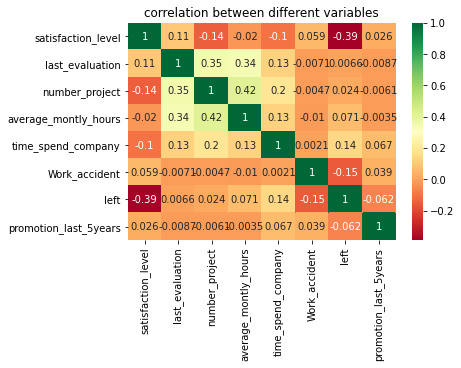

In [12]:
g = sns.heatmap(hr.corr(),annot=True,cmap="RdYlGn")
plt.title('correlation between different variables')

In [13]:
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
hr['salary']=le.fit_transform(hr['salary'])

In [14]:
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,1
14995,0.37,0.48,2,160,3,0,1,0,support,1
14996,0.37,0.53,2,143,3,0,1,0,support,1
14997,0.11,0.96,6,280,4,0,1,0,support,1


In [15]:
hr = hr.drop(labels=["sales"],axis = 1)

In [16]:
hr = hr.sample(n=10000,replace=True)

In [17]:
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
6083,0.19,0.76,3,107,5,0,0,0,1
3572,0.82,0.59,3,249,3,0,0,0,2
11538,0.17,0.66,6,224,3,0,0,0,2
11420,0.78,0.43,4,275,3,0,0,0,1
8824,0.61,0.82,3,271,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...
14622,0.84,0.99,4,262,6,0,1,0,2
11538,0.17,0.66,6,224,3,0,0,0,2
4682,0.87,0.49,4,149,2,0,0,0,1
7760,0.88,0.50,4,162,2,0,0,0,2


In [18]:
# Standardize features by removing the mean and scaling to 
# unit variance
from sklearn.preprocessing import StandardScaler

N = StandardScaler()
N.fit(hr)
hr_norm = N.transform(hr)

In [19]:
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap

In [20]:
# Linear dimensionality reduction using Singular Value Decomposition
#of the data to project it to a lower dimensional space.
pca = PCA(n_components=2)
pca_representation = pca.fit_transform(hr_norm)

In [21]:
df_pca = pd.DataFrame(pca_representation)
df_pca.head(5)

,0,1
0,-0.730845,-1.273542
1,-0.525762,0.672259
2,1.146269,-0.654415
3,-0.215976,0.468466
4,0.477731,0.578621


<AxesSubplot:xlabel='0', ylabel='1'>

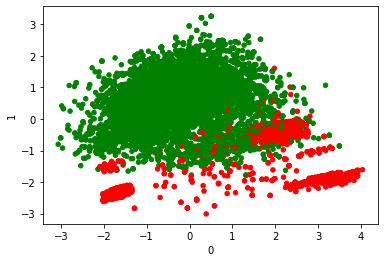

In [22]:
left_colors = hr["left"].map(lambda s : "g"  if s==0 else "r")
df_pca.plot(x=0,y=1,kind='scatter', c = left_colors)

In [23]:
iso = Isomap(n_components=2, n_neighbors=10)
iso_representation = iso.fit_transform(hr_norm)

In [24]:
df_iso = pd.DataFrame(iso_representation)
df_iso.head()

,0,1
0,-2.073743,-6.983084
1,-7.160704,5.331383
2,-6.974766,5.380092
3,-4.129726,-4.746834
4,-3.786486,-7.187650


<AxesSubplot:xlabel='0', ylabel='1'>

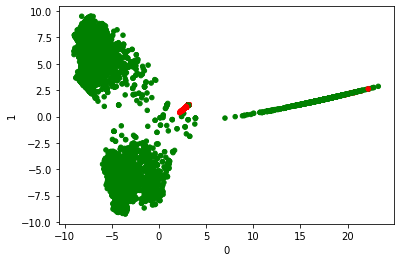

In [25]:
df_iso.plot(x=0,y=1,kind='scatter', c = left_colors)

In [26]:
hr_stay = hr[hr["left"]==0]
hr_left = hr[hr["left"]==1]

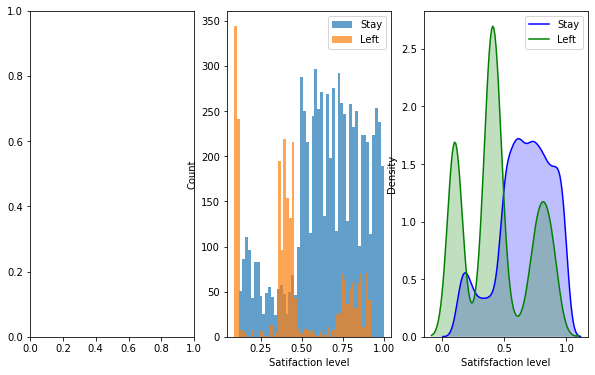

<Figure size 360x360 with 0 Axes>

In [27]:
fig, axes = plt.subplots(ncols=3,figsize=(10,6))
sns.catplot(y="satisfaction_level",x="left",data=hr,kind="box",)
axes[1].hist(hr_stay["satisfaction_level"],bins=50,label="Stay",alpha=0.7)
axes[1].hist(hr_left["satisfaction_level"],bins=50,label="Left",alpha=0.7)
axes[1].set_xlabel("Satifaction level")
axes[1].set_ylabel("Count")
axes[1].legend()


g = sns.kdeplot(data=hr_stay["satisfaction_level"],color='b',shade=True,ax=axes[2])
g = sns.kdeplot(data=hr_left["satisfaction_level"],color='g',shade=True, ax=axes[2])
g.legend(["Stay","Left"])
g.set_xlabel('Satifsfaction level')
g.set_ylabel('Density')


plt.tight_layout()
plt.gcf().clear()

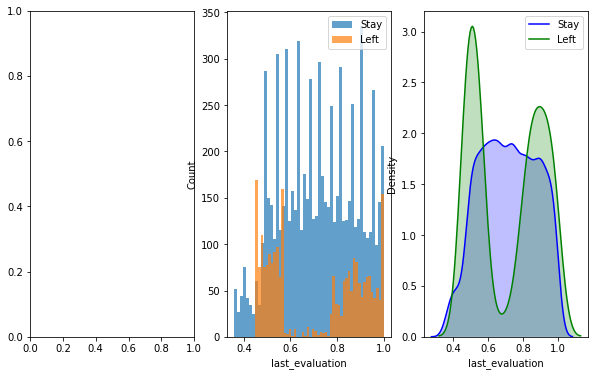

<Figure size 360x360 with 0 Axes>

In [28]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(10,6))
sns.catplot(y="last_evaluation",x="left",data=hr,kind="box")
axes[1].hist(hr_stay["last_evaluation"],bins=50,label="Stay",alpha=0.7)
axes[1].hist(hr_left["last_evaluation"],bins=50,label="Left",alpha=0.7)
axes[1].set_xlabel("last_evaluation")
axes[1].set_ylabel("Count")
axes[1].legend()

g = sns.kdeplot(data=hr_stay["last_evaluation"],color='b',shade=True,ax=axes[2])
g = sns.kdeplot(data=hr_left["last_evaluation"],color='g',shade=True, ax=axes[2])
g.legend(["Stay","Left"])
g.set_xlabel('last_evaluation')
g.set_ylabel('Density')


plt.tight_layout()
plt.gcf().clear()

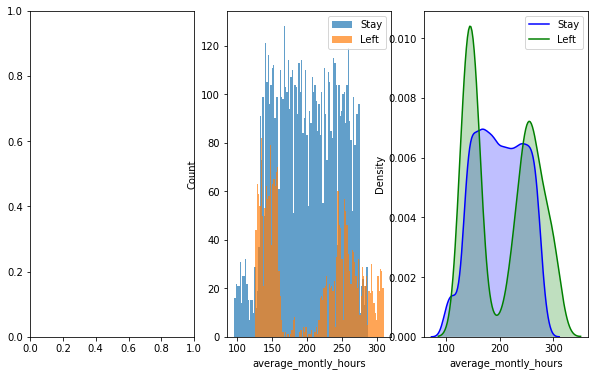

<Figure size 360x360 with 0 Axes>

In [29]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(10,6))
sns.catplot(y="average_montly_hours",x="left",data=hr,kind="box")
axes[1].hist(hr_stay["average_montly_hours"],bins=100,label="Stay",alpha=0.7)
axes[1].hist(hr_left["average_montly_hours"],bins=100,label="Left",alpha=0.7)
axes[1].set_xlabel("average_montly_hours")
axes[1].set_ylabel("Count")
axes[1].legend()

g = sns.kdeplot(data=hr_stay["average_montly_hours"],color='b',shade=True,ax=axes[2])
g = sns.kdeplot(data=hr_left["average_montly_hours"],color='g',shade=True, ax=axes[2])
g.legend(["Stay","Left"])
g.set_xlabel('average_montly_hours')
g.set_ylabel('Density')

plt.tight_layout()
plt.gcf().clear()

In [30]:
salary_counts = hr.groupby(['left'])['salary'].value_counts(normalize=True).\
rename('percentage').mul(100).reset_index()
salary_counts

,left,salary,percentage
0,0,1,45.947721
1,0,2,44.410876
2,0,0,9.641403
3,1,1,60.745706
4,1,2,36.740679
5,1,0,2.513615


Text(0, 0.5, 'percentage')

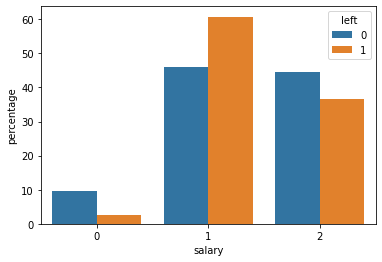

In [31]:
g = sns.barplot(x='salary',y='percentage',data=salary_counts,
            hue='left')
g.set_ylabel('percentage')

In [32]:
hr = pd.read_csv('C:/Users/SAYAN/Desktop/hr.csv')

In [33]:
sales_counts = hr.groupby(['left'])['sales'].value_counts(normalize=True).\
rename('percentage').mul(100).reset_index()
sales_counts.head()

,left,sales,percentage
0,0,sales,27.353868
1,0,technical,17.702135
2,0,support,14.648232
3,0,IT,8.347917
4,0,product_mng,6.160308


Text(0, 0.5, 'percentage')

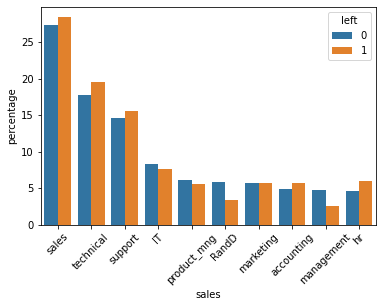

In [34]:
g = sns.barplot(x='sales',y='percentage',data=sales_counts,
            hue='left')
plt.setp(g.get_xticklabels(), rotation=45)
g.set_ylabel('percentage')

In [35]:
work_acc_counts = hr.groupby(['left'])['Work_accident'].value_counts(normalize=True).\
rename('percentage').mul(100).reset_index()
display(work_acc_counts.head())

promo_counts = hr.groupby(['left'])['promotion_last_5years'].value_counts(normalize=True).\
rename('percentage').mul(100).reset_index()
display(promo_counts)

,left,Work_accident,percentage
0,0,0,82.499125
1,0,1,17.500875
2,1,0,95.267432
3,1,1,4.732568


,left,promotion_last_5years,percentage
0,0,0,97.374869
1,0,1,2.625131
2,1,0,99.467936
3,1,1,0.532064


Text(0, 0.5, 'percentage')

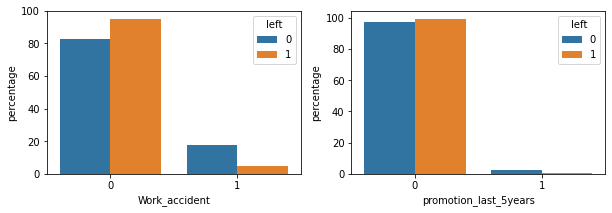

In [37]:
fig, axes = plt.subplots(ncols=2,figsize=(10,3))

g = sns.barplot(x='Work_accident',y='percentage',data=work_acc_counts,
            hue='left',ax=axes[0])
g.set_ylabel('percentage')

g = sns.barplot(x='promotion_last_5years',y='percentage',data=promo_counts,
            hue='left',ax=axes[1])
g.set_ylabel('percentage')

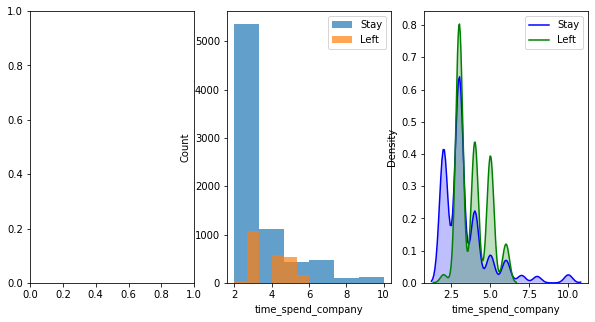

<Figure size 360x360 with 0 Axes>

In [39]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(10,5))
sns.catplot(y="time_spend_company",x="left",data=hr,kind="box")
axes[1].hist(hr_stay["time_spend_company"],bins=6,label="Stay",alpha=0.7)
axes[1].hist(hr_left["time_spend_company"],bins=6,label="Left",alpha=0.7)
axes[1].set_xlabel("time_spend_company")
axes[1].set_ylabel("Count")
axes[1].legend()

g = sns.kdeplot(data=hr_stay["time_spend_company"],color='b',shade=True,ax=axes[2])
g = sns.kdeplot(data=hr_left["time_spend_company"],color='g',shade=True, ax=axes[2])
g.legend(["Stay","Left"])
g.set_xlabel('time_spend_company')
g.set_ylabel('Density')


plt.tight_layout()
plt.gcf().clear()

In [40]:
hr.groupby(['left']).agg({'time_spend_company':np.mean})

,time_spend_company
left,
0,3.380032
1,3.876505


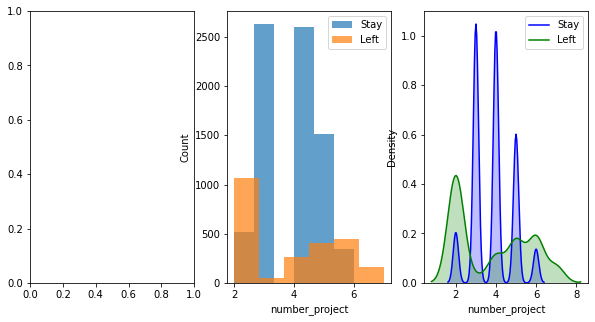

<Figure size 360x360 with 0 Axes>

In [41]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(10,5))
sns.catplot(y="number_project",x="left",data=hr,kind="box")
axes[1].hist(hr_stay["number_project"],bins=6,label="Stay",alpha=0.7)
axes[1].hist(hr_left["number_project"],bins=6,label="Left",alpha=0.7)
axes[1].set_xlabel("number_project")
axes[1].set_ylabel("Count")
axes[1].legend()

g = sns.kdeplot(data=hr_stay["number_project"],color='b',shade=True,ax=axes[2])
g = sns.kdeplot(data=hr_left["number_project"],color='g',shade=True, ax=axes[2])
g.legend(["Stay","Left"])
g.set_xlabel('number_project')
g.set_ylabel('Density')


plt.tight_layout()
plt.gcf().clear()

In [42]:
hr.groupby(['left']).agg({'number_project':np.mean})

,number_project
left,
0,3.786664
1,3.855503


In [64]:
hr = pd.read_csv('C:/Users/SAYAN/Desktop/hr.csv')

In [65]:
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
hr['salary']=le.fit_transform(hr['salary'])

In [66]:
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,1
14995,0.37,0.48,2,160,3,0,1,0,support,1
14996,0.37,0.53,2,143,3,0,1,0,support,1
14997,0.11,0.96,6,280,4,0,1,0,support,1


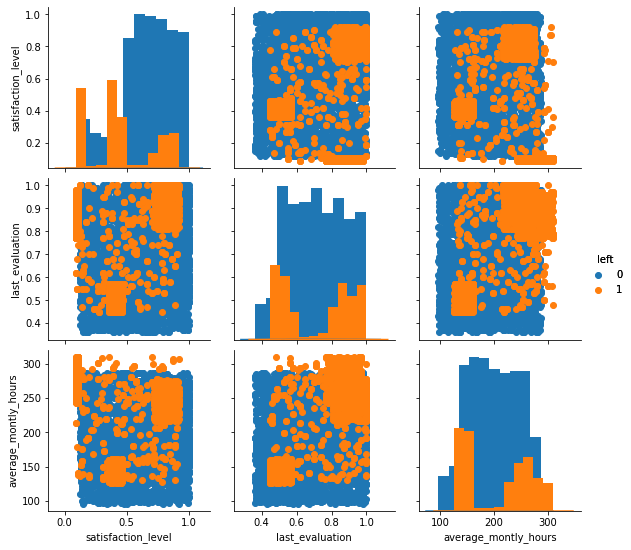

In [67]:
# pairplot uses scatterplots and histograms by default
g = sns.pairplot(hr.drop(labels=['salary','sales','number_project'\
               ,'time_spend_company','Work_accident',
               'promotion_last_5years'],axis=1),hue='left')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

# Statistical Modelling

In [90]:
hr = pd.read_csv('C:/Users/SAYAN/Desktop/hr.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [73]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [91]:
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
hr['salary']=le.fit_transform(hr['salary'])

In [92]:
hr = hr.drop(labels=["sales"],axis = 1)

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
hr['number_project']=scaler.fit_transform(hr[['number_project']])
hr['average_montly_hours']=scaler.fit_transform(hr[['average_montly_hours']])
hr['Work_accident']=scaler.fit_transform(hr[['Work_accident']])
hr['time_spend_company']=scaler.fit_transform(hr[['time_spend_company']])
hr['promotion_last_5years']=scaler.fit_transform(hr[['promotion_last_5years']])
hr['average_montly_hours'].tail()

14994    0.257009
14995    0.299065
14996    0.219626
14997    0.859813
14998    0.289720
Name: average_montly_hours, dtype: float64

In [102]:
hr.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
14994,0.40,0.57,0.0,0.257009,0.125,0.0,1,0.0,1
14995,0.37,0.48,0.0,0.299065,0.125,0.0,1,0.0,1
14996,0.37,0.53,0.0,0.219626,0.125,0.0,1,0.0,1
14997,0.11,0.96,0.8,0.859813,0.250,0.0,1,0.0,1
14998,0.37,0.52,0.0,0.289720,0.125,0.0,1,0.0,1


In [103]:
x_train = pd.get_dummies(hr.drop(labels='left',axis=1))
y_train = hr['left']

In [104]:
hr.left.value_counts(normalize=True).mul(100)

0    76.191746
1    23.808254
Name: left, dtype: float64

In [105]:
X = x_train[['satisfaction_level']]

In [106]:
X.ndim

2

In [107]:
X.shape

(14999, 1)

In [108]:
#import estimator
from sklearn.linear_model import LogisticRegression
#instantiate estimator to crate an estimator object
lr = LogisticRegression()
type(lr)

sklearn.linear_model._logistic.LogisticRegression

In [109]:
# use k-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 1234)
new_scores = cross_val_score(lr,X,y_train,cv=kf)
display(new_scores)
display(new_scores.mean())

array([0.77      , 0.76733333, 0.76733333, 0.76966667, 0.77025675])

0.7689180171168167

In [111]:
# use stratified k-fold cross validation
from sklearn.model_selection import cross_val_score
new_scores = cross_val_score(lr,x_train,y_train,cv=5)
display(new_scores)
display(new_scores.mean())

array([0.77133333, 0.774     , 0.77966667, 0.767     , 0.62087362])

0.7425747249083028

In [112]:
X = x_train[['satisfaction_level','last_evaluation']]

In [113]:
#import estimator
from sklearn.linear_model import LogisticRegression
#instantiate estimator to crate an estimator object
lr = LogisticRegression()
type(lr)

sklearn.linear_model._logistic.LogisticRegression

In [114]:
# use k-fold cross validation
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits = 5, shuffle = True, random_state = 1234)
new_scores = cross_val_score(lr,X,y_train,cv=kf)
display(new_scores)
display(new_scores.mean())

array([0.76933333, 0.768     , 0.76933333, 0.77066667, 0.77125709])

0.7697180838057129

In [115]:
# use stratified k-fold cross validation
from sklearn.model_selection import cross_val_score
new_scores = cross_val_score(lr,X,y_train,cv=5)
display(new_scores)
display(new_scores.mean())

array([0.766     , 0.77766667, 0.77633333, 0.76266667, 0.76592197])

0.7697177281315994

In [116]:
#import estimator
from sklearn.tree import DecisionTreeClassifier
#instantiate estimator to crate an estimator object
DTC = DecisionTreeClassifier(max_depth=3)
#Restricted the depth of the tree to 3 to build a simple tree
#for better interpretability

In [117]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [118]:
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits = 5, shuffle = True, random_state = 1234)
new_scores = cross_val_score(DTC,x_train,y_train,cv=kf)
display(new_scores)
display(new_scores.mean())

array([0.951     , 0.955     , 0.95466667, 0.94966667, 0.95265088])

0.9525968433922418

In [119]:
#import estimator
from sklearn.tree import DecisionTreeClassifier
#instantiate estimator to crate an estimator object
DTC = DecisionTreeClassifier(max_depth=4)

#Restricted the depth of the tree to 3 to build a simple tree
#for better interpretability

In [120]:
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits = 5, shuffle = True, random_state = 1234)
new_scores = cross_val_score(DTC,x_train,y_train,cv=kf)
display(new_scores)
display(new_scores.mean())

array([0.966     , 0.96733333, 0.97166667, 0.965     , 0.97232411])

0.9684648216072024

In [121]:
x_train.shape

(14999, 8)

In [122]:
x_train.ndim

2

In [123]:
#import estimator
from sklearn.ensemble import RandomForestClassifier
#instantiate estimator to crate an estimator object
rfc = RandomForestClassifier(n_estimators=100)
type(rfc)

sklearn.ensemble._forest.RandomForestClassifier

In [124]:
# use stratified k-fold cross validation
new_scores = cross_val_score(rfc,x_train,y_train,cv=5)
display(new_scores)
display(new_scores.mean())

array([0.99866667, 0.981     , 0.98566667, 0.99933333, 0.99466489])

0.9918663109925532

In [125]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [126]:
rfc.feature_importances_

array([0.30230001, 0.12972708, 0.19235205, 0.16882257, 0.18627669,
       0.00891665, 0.00124399, 0.01036096])

In [127]:
feature_names = x_train.columns

In [128]:
feature_names

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary'],
      dtype='object')

<AxesSubplot:ylabel='feature'>

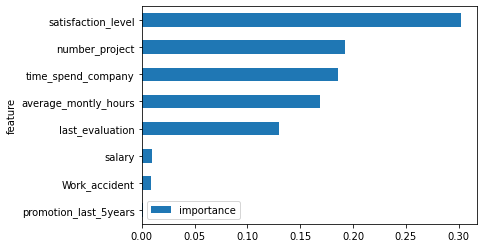

In [129]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=True).set_index('feature')
importances.plot.barh()

# It is clear that the three most important factors for employee retention are satisfaction level, number of projects and the time spent in the company. Quite ironically the features Salary, promotion and the deparment are least important factors in determining the employee retention.